## Project Scenario
Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a maximum score of 800 points. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend.

You have been provided with a dataset called schools.csv, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

## Code Implementation

   school_name  average_math
23   School 24           784
32   School 33           780
21   School 22           779
24   School 25           776
17   School 18           767
26   School 27           763
27   School 28           757
5     School 6           757
47   School 48           755
1     School 2           754


   school_name  total_SAT
42   School 43       2287
16   School 17       2273
23   School 24       2271
15   School 16       2219
2     School 3       2208
17   School 18       2173
3     School 4       2140
34   School 35       2129
1     School 2       2110
47   School 48       2052


  borough  num_schools  average_SAT  std_SAT
0   Bronx           10       1852.9   321.47


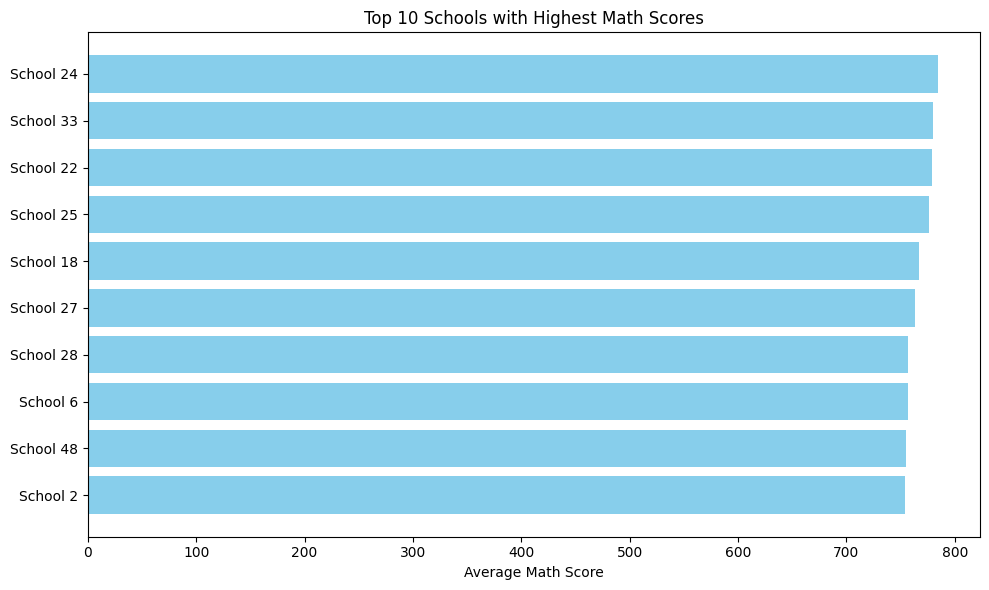

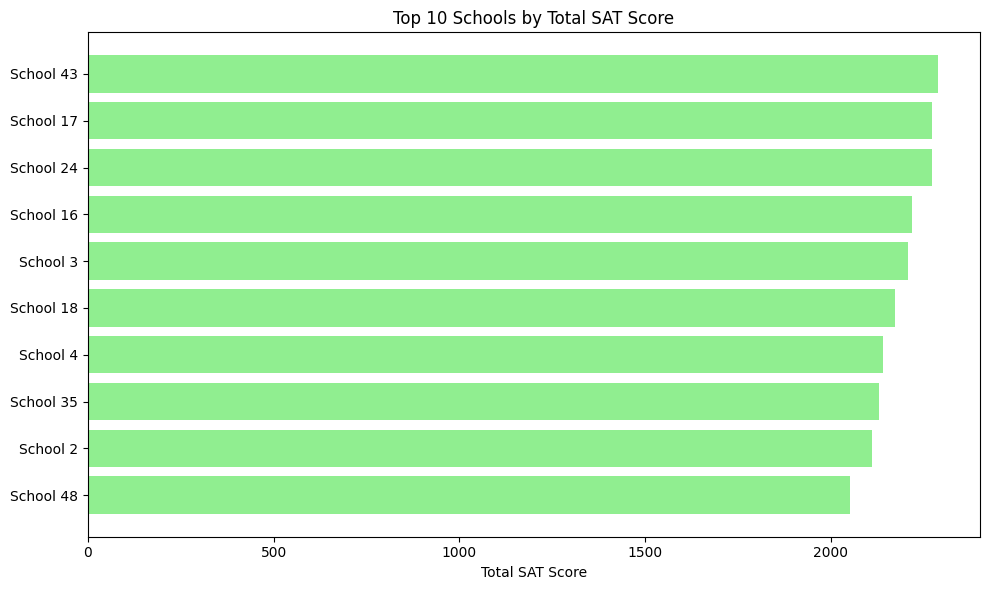

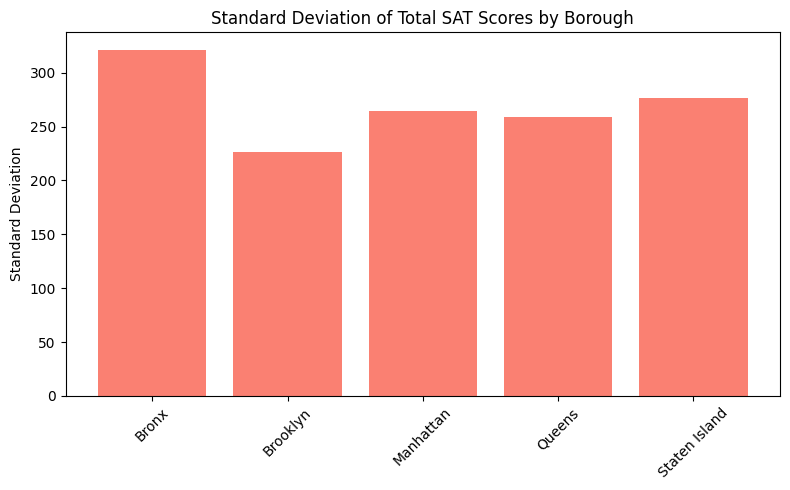

In [11]:
# Re-run this cell 
import pandas as pd

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

# Start coding here...
# Add as many cells as you like...

# Filtering out best math schools in NYC
best_math_schools = schools[schools["average_math"] >= 640][["school_name", "average_math"]]
best_math_schools = best_math_schools.sort_values("average_math", ascending=False)
print(best_math_schools.head(10))

print("\n")

# Top 10 performing schools based on combined SAT scores
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]
top_10_schools = schools[["school_name", "total_SAT"]]
top_10_schools = top_10_schools.sort_values("total_SAT", ascending=False).head(10)
print(top_10_schools)

print("\n")

# Which single borough has the largest standard deviation in the combined SAT score?
borough_stats = schools.groupby("borough")["total_SAT"].agg(num_schools="count", average_SAT="mean", std_SAT="std").reset_index()
borough_stats[["average_SAT", "std_SAT"]] = borough_stats[["average_SAT", "std_SAT"]].round(2)
largest_std_dev = borough_stats.loc[borough_stats["std_SAT"] == borough_stats["std_SAT"].max()]
print(largest_std_dev)

# 📊 Visualization using Matplotlib only

import matplotlib.pyplot as plt
# 1. Best Math Schools (Top 10)
top_math = best_math_schools.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_math["school_name"], top_math["average_math"], color="skyblue")   # horizontal bar plot
plt.xlabel("Average Math Score")
plt.title("Top 10 Schools with Highest Math Scores")
plt.gca().invert_yaxis()   # the value will start from top of the plot on y axis
plt.tight_layout()
plt.show()

# 2. Top 10 Schools by Total SAT Score
plt.figure(figsize=(10, 6))
plt.barh(top_10_schools["school_name"], top_10_schools["total_SAT"], color="lightgreen")
plt.xlabel("Total SAT Score")
plt.title("Top 10 Schools by Total SAT Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 3. Standard Deviation of SAT Scores by Borough
plt.figure(figsize=(8, 5))
plt.bar(borough_stats["borough"], borough_stats["std_SAT"], color="salmon")
plt.ylabel("Standard Deviation")
plt.title("Standard Deviation of Total SAT Scores by Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
